In [2]:
import pandas as pd

In [4]:
df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
print(df.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col+":"+str(missing_rows))

Pregnancies:111
Glucose:5
BloodPressure:35
SkinThickness:227
Insulin:374
BMI:11
DiabetesPedigreeFunction:0
Age:0
Outcome:500


In [8]:
import numpy as np

In [9]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)

In [10]:
for col in df.columns:
    missing_rows = df.loc[df[col]==0].shape[0]
    print(col+":"+str(missing_rows))

Pregnancies:111
Glucose:0
BloodPressure:0
SkinThickness:0
Insulin:0
BMI:0
DiabetesPedigreeFunction:0
Age:0
Outcome:500


In [11]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].fillna(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].mean())


In [12]:
print(df.isnull().any())

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool


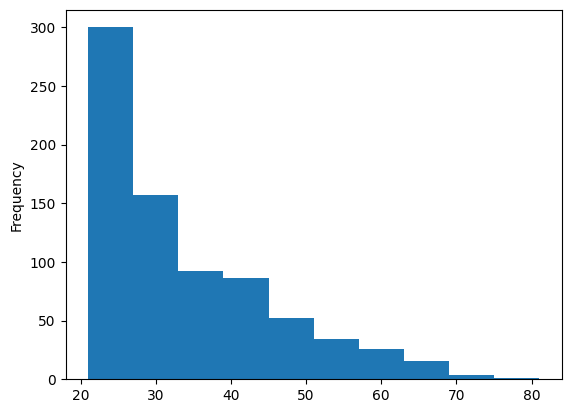

In [13]:
df.Age.plot.hist();

In [14]:
from sklearn import preprocessing
df_scaled = preprocessing.scale(df)

In [15]:
df_scaled = pd.DataFrame(df_scaled,columns = df.columns)

In [16]:
df_scaled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1.365896
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,-0.732120
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1.365896
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,-0.732120
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1.365896


In [17]:
df_scaled["Outcome"] = df["Outcome"]

In [18]:
df = df_scaled

In [19]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995,1
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672,0
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584,1
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549,0
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496,1


In [20]:
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

In [21]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.865108,-0.033518,6.655021e-01,-3.345079e-16,0.166292,0.468492,1.425995
1,-0.844885,-1.206162,-0.529859,-1.746338e-02,-3.345079e-16,-0.852531,-0.365061,-0.190672
2,1.233880,2.015813,-0.695306,8.087936e-16,-3.345079e-16,-1.332833,0.604397,-0.105584
3,-0.844885,-1.074652,-0.529859,-7.004289e-01,-7.243887e-01,-0.634212,-0.920763,-1.041549
4,-1.141852,0.503458,-2.680669,6.655021e-01,1.465506e-01,1.548980,5.484909,-0.020496


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [24]:
from keras.models import Sequential

In [25]:
model = Sequential()

from keras.layers import Dense

#Input Layer
model.add(Dense(32,activation='relu',input_dim = 8))

In [26]:
#Hidden Layer
model.add(Dense(16,activation='relu'))

#Output Layer
model.add(Dense(1,activation = 'sigmoid'))

In [27]:
model.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy']
              )

In [28]:
model.fit(X_train,y_train,epochs=200)

Epoch 1/200
20/20 [==============================] - 2s 4ms/step - loss: 0.7655 - accuracy: 0.3941
Epoch 2/200
20/20 [==============================] - 0s 4ms/step - loss: 0.6893 - accuracy: 0.5684
Epoch 3/200
20/20 [==============================] - 0s 3ms/step - loss: 0.6383 - accuracy: 0.6792
Epoch 4/200
20/20 [==============================] - 0s 4ms/step - loss: 0.5952 - accuracy: 0.7215
Epoch 5/200
20/20 [==============================] - 0s 4ms/step - loss: 0.5560 - accuracy: 0.7231
Epoch 6/200
20/20 [==============================] - 0s 3ms/step - loss: 0.5254 - accuracy: 0.7427
Epoch 7/200
20/20 [==============================] - 0s 3ms/step - loss: 0.5013 - accuracy: 0.7508
Epoch 8/200
20/20 [==============================] - 0s 4ms/step - loss: 0.4855 - accuracy: 0.7573
Epoch 9/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4738 - accuracy: 0.7573
Epoch 10/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4647 - accuracy: 0.7606
Epoch 11/

In [29]:
scores = model.evaluate(X_train,y_train)
print(scores)

scores2 = model.evaluate(X_test,y_test)
print(scores2)

20/20 [==============================] - 0s 2ms/step - loss: 0.1943 - accuracy: 0.9365
[0.19427409768104553, 0.9364820718765259]
5/5 [==============================] - 0s 3ms/step - loss: 0.6899 - accuracy: 0.7532
[0.6899069547653198, 0.7532467246055603]


In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

5/5 [==============================] - 0s 3ms/step


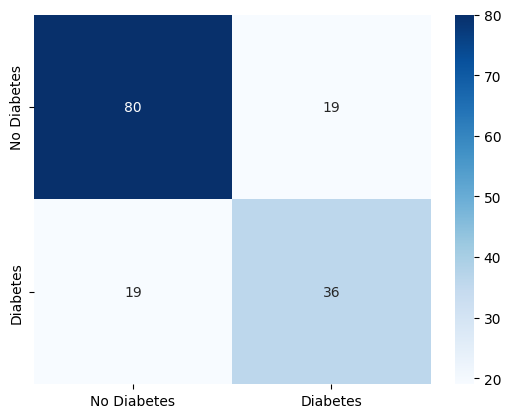

In [31]:
# Assuming model is your Sequential model

# Use predict method to get predicted probabilities
y_test_pred_prob = model.predict(X_test)

# Apply a threshold (for example, 0.5) to get predicted classes
y_test_pred = (y_test_pred_prob > 0.5).astype(int)

# Now you can proceed with the confusion matrix and visualization
c_matrix = confusion_matrix(y_test, y_test_pred)
ax = sns.heatmap(c_matrix, annot=True,
                 xticklabels=['No Diabetes', 'Diabetes'],
                 yticklabels=['No Diabetes', 'Diabetes'],
                 fmt='g', cmap='Blues')